In [1]:
import sqlite3
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
counter = 0
for rows in cur.execute('SELECT * FROM Bruggen'):
    counter += 1
    #print(rows)
print(counter)

26480115


In [2]:
# Maak verbinding met de database
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()

# Naam van de brug
Brug = 'WW'

# path waar de csv's in staan
path =r'csv\WW' 
allFiles = glob.glob(path + "/*.csv")

list_ = []

# Uitlezen van de csv files
for file_ in allFiles:
    df = pd.read_csv(file_, skiprows=23, delimiter=";", parse_dates= ["Tijd","Tijd came", "Tijd went", "Tijd ack"]) #pas alle datum kolommen aan naar datetime type
    df2 = df.iloc[:,0:14] #verwijder een lege kolom aan het einde van de dataset
    list_.append(df2)

frame = pd.concat(list_, axis = 0, ignore_index = True)

# Gooi de lege comment kolom weg en voeg een nieuwe kolom toe met het ID van de Brug
frame.drop(['Cmnt.'], inplace = True, axis=1)
frame['brug_ID'] = Brug

#schrijf het dataframe weg naar de sqlite database
frame.to_sql('Bruggen', con, if_exists = 'append')
con.commit()
#tel en print het aantal rijen van de database
cur.execute('SELECT count(*) FROM Bruggen')
result = cur.fetchone()
print(result)
con.close()


C:\Users\denni\Anaconda3\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [5]:
con = sqlite3.connect("SCADA_Bruggen")
cur = con.cursor()
cur.execute('SELECT count(*) FROM Bruggen')
result = cur.fetchone()
print(result)

(6834376,)


In [5]:
frame.drop(['Cmnt.'], inplace = True, axis=1)

In [83]:
frame.tail()

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,brug_ID
6834371,2018-01-12 00:00:42.689,PROCES,NaN,197,NaN,Meteo Actuele Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,WW
6834372,2018-01-12 00:00:38.685,PROCES,NaN,192,NaN,Meteo Gemiddelde Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Gemiddeld,WW
6834373,2018-01-12 00:00:34.680,PROCES,NaN,212,NaN,Meteo Actuele Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,WW
6834374,2018-01-12 00:00:08.617,PROCES,NaN,1.7187497615814,NaN,Meteo Actuele Windkracht,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,WW
6834375,2018-01-12 00:00:03.616,PROCES,NaN,225,NaN,Meteo Actuele Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,WW


In [35]:
frame["Tijd"].is_unique

False

In [33]:
frame.astype({'Klasse': 'category'})

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE
0,2015-01-12 23:35:08.609,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,65535.0,NO_BRUG
1,2015-01-12 23:14:22.181,LOG-IN,NaN,NaN,NaN,Afstand: hoofdoperator,NaN,NaN,NaT,NaT,NaT,23.0,NO_BRUG
2,2015-01-12 23:14:19.910,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
3,2015-01-12 23:14:19.904,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
4,2015-01-12 20:33:38.173,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,65535.0,NO_BRUG
5,2015-01-12 20:13:38.619,LOG-IN,NaN,NaN,NaN,Afstand: operator,NaN,NaN,NaT,NaT,NaT,33.0,NO_BRUG
6,2015-01-12 20:13:37.022,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
7,2015-01-12 20:13:37.019,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
8,2015-01-12 14:17:00.664,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,65535.0,NO_BRUG
9,2015-01-12 14:05:32.943,LOG-IN,NaN,NaN,NaN,Afstand: operator,NaN,NaN,NaT,NaT,NaT,38.0,NO_BRUG


In [58]:
frame[frame.duplicated({'Tijd','Type','Omschrijving','DPE'})]

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE
125704,2015-12-24 09:04:22.643,PROCES,NaN,TRUE,NaN,NO Brug Commando Toon Object Selectiescherm,NaN,NaN,NaT,NaT,NaT,19.0,NO_BRUG.CLIENT.AFSTAND.CMD_TOON_OBJ_SELECTIE
205290,2016-01-13 12:56:15.509,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
291689,2016-01-02 23:00:01.087,PROCES,NaN,TRUE,NaN,Afsluitbomen Algemeen Nacht Stand,NaN,NaN,NaT,NaT,NaT,0.0,DB_L21-Asb-Alg-S.Status._00
291690,2016-01-02 23:00:01.087,PROCES,NaN,FALSE,NaN,Afsluitbomen Algemeen Dag Stand,NaN,NaN,NaT,NaT,NaT,0.0,DB_L21-Asb-Alg-S.Status._01
291691,2016-01-02 22:59:59.823,PROCES,NaN,192,NaN,Meteo Actuele Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel
291692,2016-01-02 22:59:39.692,PROCES,NaN,5.2604160308838,NaN,Meteo Gemiddelde Windkracht,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windkracht.Gemiddeld
291693,2016-01-02 22:58:17.124,PROCES,NaN,8.7673606872559,NaN,Meteo Actuele Windkracht,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel
291694,2016-01-02 22:57:53.001,PROCES,NaN,235,NaN,Meteo Actuele Windrichting,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel
291695,2016-01-02 22:57:09.659,PROCES,NaN,5.0235090255737,NaN,Meteo Gemiddelde Windkracht,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windkracht.Gemiddeld
291696,2016-01-02 22:56:16.392,PROCES,NaN,6.684027671814,NaN,Meteo Actuele Windkracht,NaN,NaN,NaT,NaT,NaT,0.0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel


146566


In [7]:
frame.describe()

,Klasse,ID,Gebr.ID
count,3204.000000,3.203000e+03,6.832864e+06
mean,1.447878,3.023958e+05,1.979890e+02
std,1.078599,2.302554e+05,3.484270e+03
min,1.000000,1.000020e+05,0.000000e+00
25%,1.000000,1.200440e+05,0.000000e+00
50%,1.000000,3.100310e+05,0.000000e+00
75%,2.000000,4.100180e+05,0.000000e+00
max,7.000000,1.200006e+06,6.553500e+04


In [65]:
frame.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834376 entries, 0 to 6834375
Data columns (total 13 columns):
Tijd            6834376 non-null datetime64[ns]
Type            6834376 non-null object
Klasse          3204 non-null float64
Waarde          6794644 non-null object
ID              3203 non-null float64
Omschrijving    6834376 non-null object
Status          3203 non-null object
Prioriteit      3203 non-null object
Tijd came       3954 non-null datetime64[ns]
Tijd went       3954 non-null datetime64[ns]
Tijd ack        2442 non-null datetime64[ns]
Gebr.ID         6832864 non-null float64
DPE             6834376 non-null object
dtypes: datetime64[ns](4), float64(3), object(6)
memory usage: 677.8+ MB


In [61]:
frame.count()

Tijd            6834376
Type            6834376
Klasse             3204
Waarde          6794644
ID                 3203
Omschrijving    6834376
Status             3203
Prioriteit         3203
Tijd came          3954
Tijd went          3954
Tijd ack           2442
Gebr.ID         6832864
DPE             6834376
dtype: int64

In [10]:
frame.head()

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE
0,2015-01-12 23:35:08.609,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,65535.0,NO_BRUG
1,2015-01-12 23:14:22.181,LOG-IN,NaN,NaN,NaN,Afstand: hoofdoperator,NaN,NaN,NaT,NaT,NaT,23.0,NO_BRUG
2,2015-01-12 23:14:19.910,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
3,2015-01-12 23:14:19.904,LOG-UIT,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,4097.0,NO_BRUG
4,2015-01-12 20:33:38.173,LOG-IN,NaN,NaN,NaN,Afstand: meekijken,NaN,NaN,NaT,NaT,NaT,65535.0,NO_BRUG


In [11]:
frame.isnull().sum()

Tijd                  0
Type                  0
Klasse          6831172
Waarde            39732
ID              6831173
Omschrijving          0
Status          6831173
Prioriteit      6831173
Tijd came       6830422
Tijd went       6830422
Tijd ack        6831934
Gebr.ID            1512
DPE                   0
dtype: int64

In [12]:
frame['Klasse'].describe()

count    3204.000000
mean        1.447878
std         1.078599
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Klasse, dtype: float64

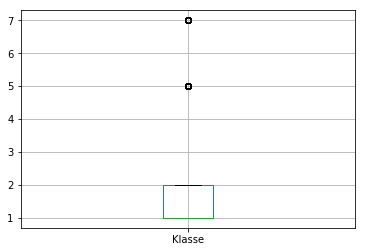

In [13]:
frame.boxplot(column="Klasse")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C9BD77F60>]],
      dtype=object)

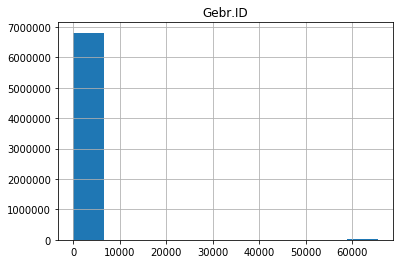

In [14]:
frame.hist(column='Gebr.ID')

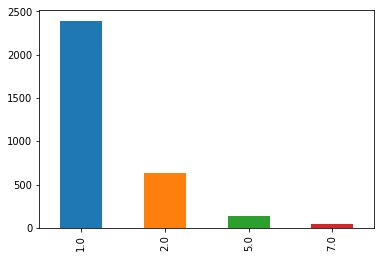

In [15]:
frame['Klasse'].value_counts().plot.bar()

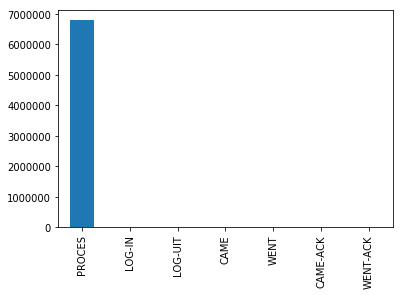

In [16]:
frame['Type'].value_counts().plot.bar()

In [17]:
came_df = frame[frame.Type == "CAME"]
came_df.columns = ['Tijd', 'Type', 'Klasse', 'Waarde', 'ID', 'Omschrijving', 'Status', 'Prioriteit', 'Tijd_came' , 'Tijd_went', 'Tijd_ack','Gebr.ID','DPE']
came_df.count()
#came_df.info()

Tijd            1571
Type            1571
Klasse          1188
Waarde          1571
ID              1188
Omschrijving    1571
Status          1188
Prioriteit      1188
Tijd_came       1571
Tijd_went       1571
Tijd_ack         812
Gebr.ID          812
DPE             1571
dtype: int64

In [18]:
came_df.tail(50)

,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd_came,Tijd_went,Tijd_ack,Gebr.ID,DPE
6631201,2018-10-25 23:00:00.006,CAME,NaN,1,NaN,backup is running,NaN,NaN,2018-10-25 23:00:00.006,2018-10-25 23:01:00.361,NaT,NaN,_DataManager.Backup.Status
6640971,2018-10-26 23:00:00.005,CAME,NaN,1,NaN,backup is running,NaN,NaN,2018-10-26 23:00:00.005,2018-10-26 23:01:00.363,NaT,NaN,_DataManager.Backup.Status
6648786,2018-10-27 23:00:00.005,CAME,NaN,1,NaN,backup is running,NaN,NaN,2018-10-27 23:00:00.005,2018-10-27 23:01:00.361,NaT,NaN,_DataManager.Backup.Status
6648956,2018-10-27 22:37:16.992,CAME,1.0,TRUE,140000.0,Veiligheidsgerelateerde Hardware Fout Opgetreden,Openstaand,Urgent,2018-10-27 22:37:16.992,2018-10-27 22:42:07.689,2018-10-28 00:03:45.523,138.0,DB_B21-BedLokaal-S.Status.Output.SSafeResetQSign
6648973,2018-10-27 22:33:55.091,CAME,1.0,TRUE,140000.0,Veiligheidsgerelateerde Hardware Fout Opgetreden,Openstaand,Urgent,2018-10-27 22:33:55.091,2018-10-27 22:34:01.090,NaT,NaN,DB_B21-BedLokaal-S.Status.Output.SSafeResetQSign
6648975,2018-10-27 22:33:53.094,CAME,1.0,TRUE,1200003.0,Noodstop Routering Verbinding Storing (Send),Openstaand,Urgent,2018-10-27 22:33:53.094,2018-10-27 22:42:20.697,2018-10-28 00:57:44.802,0.0,NO_BRUG.NOODSTOP.COMM_ERR_SND
6648976,2018-10-27 22:33:52.988,CAME,1.0,TRUE,1200002.0,Noodstop Routering Verbinding Storing (Receive),Openstaand,Urgent,2018-10-27 22:33:52.988,2018-10-27 22:42:20.697,2018-10-28 00:57:44.802,0.0,NO_BRUG.NOODSTOP.COMM_ERR_RCV
6649002,2018-10-27 22:28:40.791,CAME,1.0,TRUE,140000.0,Veiligheidsgerelateerde Hardware Fout Opgetreden,Openstaand,Urgent,2018-10-27 22:28:40.791,2018-10-27 22:28:46.989,NaT,NaN,DB_B21-BedLokaal-S.Status.Output.SSafeResetQSign
6649004,2018-10-27 22:28:38.789,CAME,1.0,TRUE,1200003.0,Noodstop Routering Verbinding Storing (Send),Openstaand,Urgent,2018-10-27 22:28:38.789,2018-10-27 22:29:01.190,NaT,NaN,NO_BRUG.NOODSTOP.COMM_ERR_SND
6649005,2018-10-27 22:28:38.789,CAME,1.0,TRUE,1200002.0,Noodstop Routering Verbinding Storing (Receive),Openstaand,Urgent,2018-10-27 22:28:38.789,2018-10-27 22:29:01.190,NaT,NaN,NO_BRUG.NOODSTOP.COMM_ERR_RCV


In [19]:
dates = came_df['Tijd']
count2015 = 0
count2016 = 0
count2017 = 0
count2018 = 0
for row in dates:
    year = row.year
    if year == 2015:
        count2015 += 1
    if year == 2016:
        count2016 += 1
    if year == 2017:
        count2017 += 1
    if year == 2018:
        count2018 += 1

lst = [count2015, count2016, count2017, count2018]
print(lst)

[13, 974, 279, 305]


In [20]:
times = came_df['Tijd']
cames = came_df['Tijd_came']
times.equals(cames)


True

Text(0, 0.5, 'tijd foutmelding')

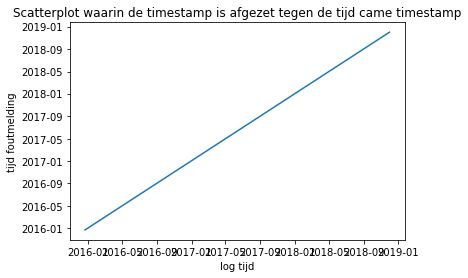

In [21]:
plt.plot(came_df['Tijd'], came_df['Tijd_came'])
plt.title("Scatterplot waarin de timestamp is afgezet tegen de tijd came timestamp")
plt.xlabel("log tijd")
plt.ylabel("tijd foutmelding")
#plt.axis('off')

Text(0, 0.5, 'foutmelding opgelost')

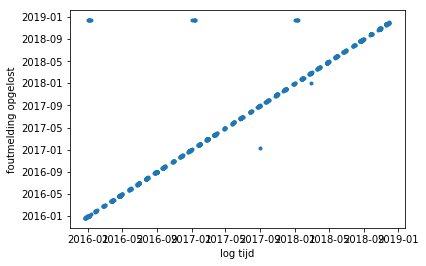

In [22]:
plt.plot(came_df['Tijd_came'], came_df['Tijd_went'],'.')
plt.xlabel("log tijd")
plt.ylabel("foutmelding opgelost")

In [23]:
print(came_df[came_df.Tijd_went > datetime.datetime(2018, 12, 1,0,0,0,0)])

                           Tijd  Type  Klasse Waarde  ID       Omschrijving  \
285933  2016-01-02 23:00:00.006  CAME     NaN      1 NaN  backup is running   
438234  2016-01-03 23:00:00.006  CAME     NaN      1 NaN  backup is running   
609735  2016-01-04 23:00:00.012  CAME     NaN      1 NaN  backup is running   
813011  2016-01-05 23:00:00.005  CAME     NaN      1 NaN  backup is running   
1145540 2016-01-07 23:00:00.006  CAME     NaN      1 NaN  backup is running   
2351323 2016-01-12 23:00:00.005  CAME     NaN      1 NaN  backup is running   
2473776 2017-01-01 23:00:00.008  CAME     NaN      1 NaN  backup is running   
3800245 2017-01-08 23:00:00.005  CAME     NaN      1 NaN  backup is running   
4086870 2017-01-09 23:00:00.005  CAME     NaN      1 NaN  backup is running   
4442589 2017-01-11 23:00:00.005  CAME     NaN      1 NaN  backup is running   
4603235 2017-01-12 23:00:00.006  CAME     NaN      1 NaN  backup is running   
4741752 2018-01-01 23:00:00.005  CAME     NaN      1

In [24]:
went_df = frame[frame.Type == "WENT"]
went_df.columns = ['Tijd', 'Type', 'Klasse', 'Waarde', 'ID', 'Omschrijving', 'Status', 'Prioriteit', 'Tijd_came' , 'Tijd_went', 'Tijd_ack','Gebr.ID','DPE']
went_df.count()

Tijd            1565
Type            1565
Klasse          1198
Waarde          1565
ID              1197
Omschrijving    1565
Status          1197
Prioriteit      1197
Tijd_came       1565
Tijd_went       1565
Tijd_ack         812
Gebr.ID          812
DPE             1565
dtype: int64

Text(0, 0.5, 'foutmelding opgelost')

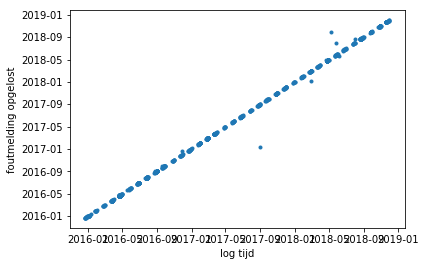

In [25]:
plt.plot(went_df['Tijd_came'], went_df['Tijd_went'], '.')
plt.xlabel("log tijd")
plt.ylabel("foutmelding opgelost")

In [26]:
print(went_df[went_df.Tijd_went< went_df.Tijd_came])

                           Tijd  Type  Klasse Waarde        ID  \
4088565 2017-01-09 12:23:35.492  WENT     5.0  FALSE  470008.0   
5015619 2018-01-03 16:47:59.190  WENT     5.0  FALSE  470008.0   
5560132 2018-05-22 08:58:29.396  WENT     1.0  FALSE  440000.0   

                                              Omschrijving      Status  \
4088565             Objectbewaking Alarm Niet Ingeschakeld  Openstaand   
5015619             Objectbewaking Alarm Niet Ingeschakeld  Openstaand   
5560132  Apparatenkast Bruginstallatie Temperatuur Te Hoog  Openstaand   

        Prioriteit               Tijd_came               Tijd_went Tijd_ack  \
4088565  Onderhoud 2017-08-31 10:05:22.799 2017-01-09 12:23:35.492      NaT   
5015619  Onderhoud 2018-02-28 13:03:04.496 2018-01-03 16:47:59.190      NaT   
5560132     Urgent 2018-06-05 16:40:18.400 2018-05-22 08:58:29.396      NaT   

         Gebr.ID                                DPE  
4088565      NaN  DB_V61-Objectbewaking-S.Alarm._08  
5015619      

In [27]:
times = went_df['Tijd']
wents = went_df['Tijd_went']
times.equals(wents)


True

In [28]:
temp_df = frame[frame.Type == "CAME-ACK"]
temp_df.count()

Tijd            475
Type            475
Klasse          475
Waarde          475
ID              475
Omschrijving    475
Status          475
Prioriteit      475
Tijd came       475
Tijd went       475
Tijd ack        475
Gebr.ID         475
DPE             475
dtype: int64

In [29]:
temp_df = frame[frame.Type == "WENT-ACK"]
temp_df.count()

Tijd            343
Type            343
Klasse          343
Waarde          343
ID              343
Omschrijving    343
Status          343
Prioriteit      343
Tijd came       343
Tijd went       343
Tijd ack        343
Gebr.ID         343
DPE             343
dtype: int64